In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [40]:
import sys
print(str(sys.version_info))

sys.version_info(major=3, minor=7, micro=5, releaselevel='final', serial=0)


In [138]:
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

## Load data from csv 

In [114]:
data1 = pd.read_csv("chat_features1.csv")
data2 = pd.read_csv("chat_features2.csv")
datas = [data1, data2]
for data in datas:
    data.columns = [
        "channel",
        "duration",
        "start_timestamp",
        "message_count", 
        "mod_message_count", 
        "sub_message_count",
        "turbo_message_count",
        "self_toxic_count",
        "self_positive_count",
        "hopped_toxic_count",
        "hopped_positive_count"
    ]
data = pd.concat([data1, data2])


In [115]:
data = data.dropna(axis=0)

data["month"] = data.apply(lambda row: datetime.fromtimestamp(row["start_timestamp"]).month, axis=1)
data["day"] = data.apply(lambda row: datetime.fromtimestamp(row["start_timestamp"]).day, axis=1)
data["hour"] = data.apply(lambda row: datetime.fromtimestamp(row["start_timestamp"]).hour, axis=1)

In [116]:
X = data.drop(labels=["start_timestamp", "duration", "channel", "hopped_toxic_count", "hopped_positive_count"], axis=1)
y = data["hopped_toxic_count"]

In [117]:
X

,message_count,mod_message_count,sub_message_count,turbo_message_count,self_toxic_count,self_positive_count,month,day,hour
0,527,115,369,1,101,116,10,13,1
1,2523,251,1236,1,385,433,10,13,1
2,606,91,520,0,156,91,10,13,1
3,3521,110,719,9,426,650,10,13,1
4,59,3,53,0,7,27,10,13,1
...,...,...,...,...,...,...,...,...,...
26065,630,220,598,0,63,157,11,1,0
26066,931,403,869,0,93,155,11,1,0
26067,508,158,476,0,95,158,11,1,0
26068,285,0,0,0,0,95,11,1,0


In [241]:
y

0         0
1         0
2         0
3        21
4         3
         ..
26065     0
26066     0
26067     0
26068     0
26069     0
Name: hopped_toxic_count, Length: 57805, dtype: int64

In [119]:
print(f"{len(X)} == {len(y)}")

57805 == 57805


## Linear regression

In [309]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

train_predicted = model.predict(X_train)
train_mse = metrics.mean_squared_error(y_train, train_predicted)
print(train_mse)

test_predicted = model.predict(X_test)
test_mse = metrics.mean_squared_error(y_test, test_predicted)
print(test_mse)

score = model.score(X_test, y_test)
print(score)


16.765848980969952
12.841962011877882
0.4027389581424151


/home/goatgoose/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


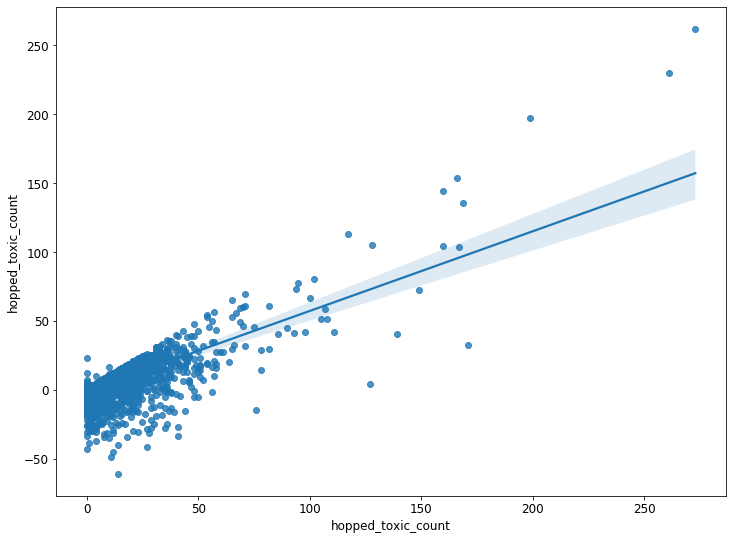

In [310]:
residuals = y_train - train_predicted
ax = sns.regplot(y_train, residuals)

## Most toxic channels

### Meantoxic count

In [301]:
data.groupby(["channel"]).mean().sort_values("hopped_toxic_count", ascending=False).head(30)

,duration,start_timestamp,message_count,mod_message_count,sub_message_count,turbo_message_count,self_toxic_count,self_positive_count,hopped_toxic_count,hopped_positive_count,month,day,hour
channel,,,,,,,,,,,,,
aoc,3600.0,1.603248e+09,42515.000000,143.250000,0.000000,85.750000,4190.000000,9110.750000,125.000000,292.250000,10.000000,20.250000,16.500000
tubbo,3600.0,1.604088e+09,24391.250000,129.000000,2607.250000,0.250000,1106.500000,2728.750000,112.000000,208.250000,10.000000,30.000000,15.500000
ilhan,3600.0,1.603247e+09,5457.500000,6.500000,0.000000,9.500000,336.500000,1323.500000,102.000000,173.500000,10.000000,20.000000,21.500000
jawsh,3600.0,1.603166e+09,6757.000000,119.000000,2319.000000,0.000000,541.000000,699.000000,95.000000,56.000000,10.000000,19.000000,23.000000
tommyinnit,3600.0,1.604068e+09,30894.000000,118.000000,4388.000000,0.750000,510.500000,1305.250000,64.500000,169.750000,10.000000,29.750000,16.250000
eajparkofficial,3600.0,1.603737e+09,13451.812500,35.312500,0.000000,18.125000,998.625000,2811.500000,51.187500,120.750000,10.000000,25.875000,16.875000
xqcow,3600.0,1.603278e+09,26419.000000,97.580645,11799.870968,72.935484,2040.741935,3656.774194,48.451613,72.935484,10.000000,20.806452,11.193548
sykkuno,3600.0,1.603353e+09,13582.259740,185.883117,5005.077922,30.818182,1165.337662,2678.194805,37.155844,92.025974,10.012987,21.142857,14.142857
karljacobs,3600.0,1.603777e+09,15672.555556,8.333333,1364.000000,0.000000,992.666667,2860.333333,33.888889,80.666667,10.000000,26.333333,16.666667


### Max toxic count

In [302]:
data.groupby(["channel"]).max().sort_values("hopped_toxic_count", ascending=False).head(30)

,duration,start_timestamp,message_count,mod_message_count,sub_message_count,turbo_message_count,self_toxic_count,self_positive_count,hopped_toxic_count,hopped_positive_count,month,day,hour
channel,,,,,,,,,,,,,
bazzagazza,3600,1.603950e+09,6666,68,2472,12,683,1517,273,95,10,29,23
eajparkofficial,3600,1.603868e+09,26310,172,0,91,1920,5622,261,509,10,28,23
aoc,3600,1.603253e+09,60344,310,0,118,7192,13055,199,392,10,21,23
hasanabi,3600,1.603304e+09,45653,260,32284,148,2965,6693,171,574,10,21,23
trainwreckstv,3600,1.604205e+09,14187,617,4543,110,2309,2249,169,223,11,31,23
tubbo,3600,1.604094e+09,46653,314,4819,1,1907,4580,167,222,10,30,17
crayator,3600,1.604034e+09,6861,581,5407,35,937,889,166,134,10,30,23
xqcow,3600,1.603951e+09,40952,251,17745,247,3356,7069,160,178,10,29,23
tommyinnit,3600,1.604092e+09,43622,227,6206,3,878,1812,149,250,10,30,17
